# TASK 3: End-to-End Data Science Project
**Goal:** Predict if a person has heart disease using machine learning and build a deployable web app.



## Step 1: Load and Explore the Data
File used: heart.csv

🔍 **Objective:**
Understand what data we are working with.

Identify the target column and features.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# View the first 5 rows
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Overview of dataset
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak  

## Step 2: Visualize the Data
**Objective:**

- Explore feature distributions.
- Analyze correlation between features.
- Understand which factors relate to heart disease.

**Explanation:**
- Countplot: Shows how many patients have heart disease (target = 1) and how many don't (target = 0).
- Heatmap: Reveals how each feature is correlated with others and the target. Helps select features.
- Histograms: Show the distribution of continuous features like age and cholesterol.

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_3068\3611900472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


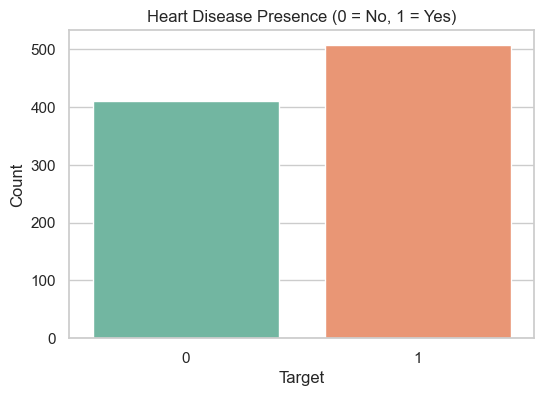

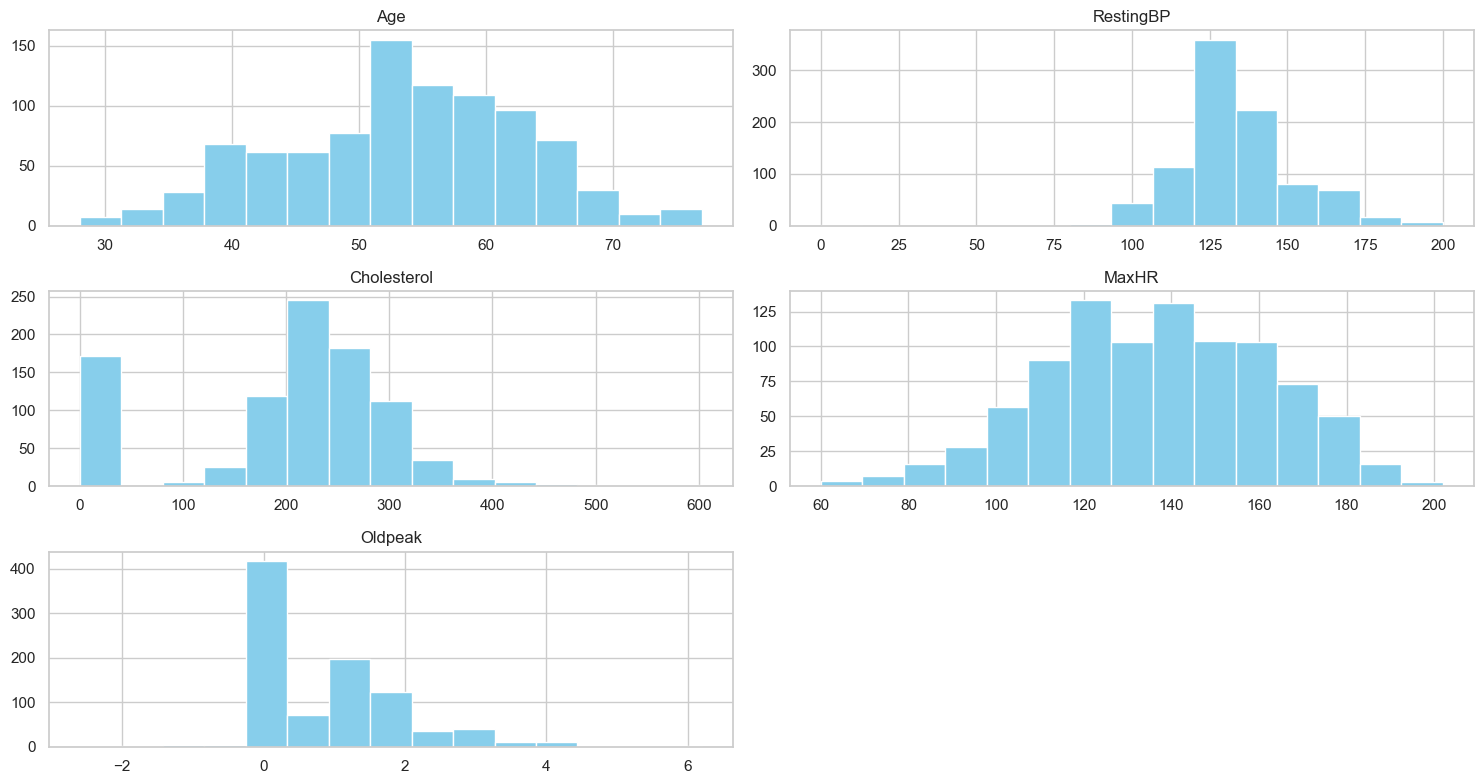

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Heart Disease Presence (0 = No, 1 = Yes)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plot correlation heatmap
# plt.figure(figsize=(12, 10))
# corr = df.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()

# Histogram for a few important features
important_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[important_cols].hist(bins=15, figsize=(15, 8), color='skyblue')
plt.tight_layout()
plt.show()


## Step 3: Data Preprocessing

**Objective:**
- Handle missing values (if any)
- Encode categorical variables
- Feature scaling
- Split data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
# print(df.isnull().sum())

# Step 1: Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
print(X)
print(y)

# Step 2: Feature Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42, stratify=y)

# Confirm shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
0      172              N      0.0       

**Explanation:**
- Missing values check: Makes sure the dataset is clean.
- X vs y: Separates the features (X) and the label/target (y).
- StandardScaler: Standardizes features to have zero mean and unit variance (helps in faster convergence of models like logistic regression, SVM, etc.).
- Train-Test Split: 80% for training, 20% for testing — with stratify=y to ensure balanced class distribution.

## Step 4: Model Building & Training
**Objective:**
Build a classification model to predict heart disease.
We'll start with Logistic Regression, then later we can explore Random Forest, SVM, etc

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
model = LogisticRegression()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'M'

**Explanation:**
- LogisticRegression(): Good baseline classifier for binary classification.
- fit(): Trains the model using training data.
- predict(): Predicts on test data.
- accuracy_score: Tells how many predictions were correct.
- classification_report: Gives precision, recall, f1-score.
- confusion_matrix: Tells how many true positives, false negatives, etc.



## Step 5: Model Improvement & Comparison
**Objective:**
Try different machine learning models to see which one performs best.

We'll compare:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


**Explanation:**
| Model              | Notes                                            |
| ------------------ | ------------------------------------------------ |
| LogisticRegression | Fast and simple, good baseline                   |
| KNN                | Sensitive to scaling, works well with small data |
| Decision Tree      | Easy to interpret, prone to overfitting          |
| Random Forest      | Ensemble method, usually high accuracy           |
| SVM                | Effective in high-dimensional spaces             |


## Step 6: Save the Best Model for Deployment
Let’s say Random Forest gave you the highest accuracy — we’ll save that model using joblib (or pickle) so you can later load it in a Flask web app

In [ ]:
import joblib

# Train the final model (replace with your best model)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save to file
joblib.dump(best_model, 'heart_disease_model.pkl')
print("Model saved successfully.")

# Load the saved model
model = joblib.load('heart_disease_model.pkl')

# Predict using the loaded model
sample_prediction = model.predict([X_test[0]])
print(f"Prediction for first test sample: {sample_prediction}")


## Step 7: Flask Web App Deployment